<a href="https://colab.research.google.com/github/deepakbharadwaj99/deepakbharadwaj99/blob/main/tata_motors_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [24]:
# Defining the stock symbol and the date range
symbol = 'TATAMOTORS.NS'
start_date = '2020-01-01'
end_date = '2022-01-01'

# Download stock data using yfinance
data = yf.download(symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [25]:
# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

# Drop rows with missing values
data = data.dropna()

# Create a feature matrix (X) and target variable (y)
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Daily_Return']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [28]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [29]:
# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Training MSE: {mse_train}')
print(f'Test MSE: {mse_test}')


Training MSE: 0.0005354299492417322
Test MSE: 0.0008541017335068083


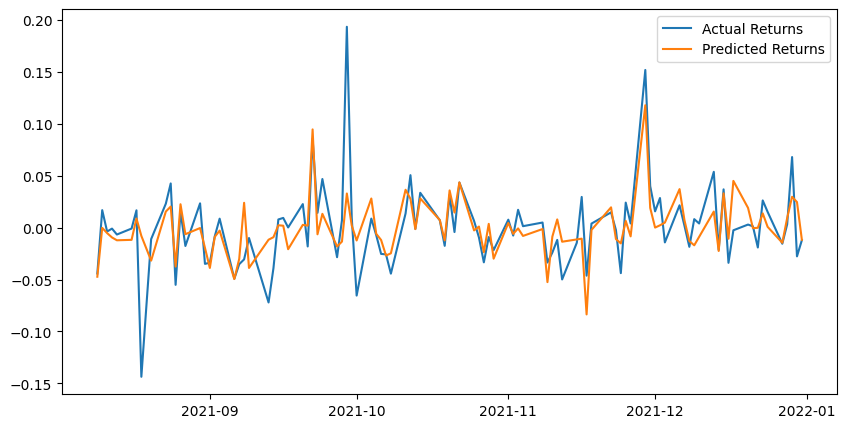

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Returns')
plt.plot(data.index[-len(y_test):], y_pred_test, label='Predicted Returns')
plt.legend()
plt.show()
